<center>
<h1 style='text-align : justify; direction: rtl'><center>AI_CA4</center></h1>
<h2 style='text-align : justify; direction: rtl'><center>سید احسان حسن بیگی - 810197619</center></h2>

<h1 style='text-align : justify; direction: rtl'>
    خلاصه و اهداف:
</h1>
<p style='text-align : justify; direction: rtl'>
در این پروژه قصد آشنایی با regressor ها را داریم. به طور کلی مسائل classifying و regression جزء اساسی ترین بخش های machine learning قرار دارند که امروزه نیز بسیار پر کاربرد محسوب می‌شوند.
    تفاوت این دو دسته در آن است که در classifying قرار است example ها را به یک تعداد کلاس محدود و گسسته map کنیم. این در حالی است که در regression خروجی یک بازه پیوسته است.
    برای نمونه در این پروژه قرار است قیمت های تعدادی آگهی خودرو را پیش بینی کنیم که بازه ای پیوسته محسوب می‌شود.
    <br>
    این فرایند را در فاز های زیر انجام دادیم که در ادامه به توضیح دقیق تر درباره هر کدام می‌پردازیم.
<ul style='text-align : justify; direction: rtl'>
  <li> فاز اول (پیش پردازش)
      <ul>
      <li>خواندن ورودی و حذف exampleهای ناقص
      </li>
      <li>پردازش متن توضیحات هر آگهی
      </li>
      <li>جایگزین کردن ستون مربوط به توضیحات هر آگهی با تعدادی از کلمات تاثیر گذار آن
      </li>
      <li>حذف ستون هایی که information gain کمی دارند
      </li>
      <li>تبدیل ستون های categorical به دیتای قابل استفاده (encoding)
      </li>
      </ul>
  </li>
  <li> فاز دوم (پیش بینی)
      <ul>
          <li>پردازش dataset به دست آمده با روش های مختلف و مقایسه نتایج
          </li>
      </ul>
  </li>  
</ul> 
</p>

***

<h1 style='text-align : justify; direction: rtl'>
    phase1
</h1>

<h2 style='text-align : justify; direction: rtl'>
    Q4:
</h2>
<p style='text-align : justify; direction: rtl'>
در گام نخست فایل ورودی را خوانده و example های ناقص را از آن حذف می‌کنیم.
    این موارد شامل ردیف هایی است که missing value به صورت nan داشته و یا قیمت آن ها -1 باشد.
    <br>
    شایان ذکر است که روش های متفاوتی در خصوص برخورد با missing values وجود دارد که به عنوان نمونه می‌توان به موارد زیر اشاره کرد:
<ul style='text-align : justify; direction: rtl'>
  <li>حذف ردیفی که در آن داده گمشده وجود دارد
      <br>
      ایراد این کار از دست دادن بخشی از اطلاعات است. اما با توجه به بزرگ بودن مجموعه اطلاعات در مورد ما و برای سادگی از این روش استفاده کردیم
  </li>
  <li>قرار دادن یک تخمین مانند میانگین به جای داده گمشده
    <br>
    این روش در کل بهتر از پاک کردن کل ردیف عمل می‌کند اما همچنان دقت بالایی نداشته و ممکن است واریانس داده ها را به طرز مصنوعی کاهش دهد.
  </li>
</ul> 
</p>
<p style='text-align : justify; direction: rtl'>
    سپس برای ستون year، آن دسته از ردیف هایی که این فیلد برایشان به صورت «< 1366» است را با عدد 1365 جایگزین می‌کنیم و کل ستون را به صورت numeric در می‌آوریم.
    <br>
    حال نوبت به پردازش متن می‌رسد. برای این منظور ابتدا دو ستون title و description را با هم ادغام کرده و سپس عملیات های پردازشی کتابخانه هضم را بر روی آن اعمال می‌کنیم که توضیحات مربوط به هر یک به شرح زیر است.
</p>
<ul style='text-align : justify; direction: rtl'>
  <li>normalize:
      این فانکشن با قرار دادن نیم فاصله ها از در نظر گرفته شدن یکسری از کلمات مانند «ها» تحت عنوان یک توکن جدا جلوگیری میکند
  </li>
  <li>tokenize:
      این تابع قرار است یک string که توضیحات هر کتاب باشد، را گرفته و یک آرایه از توکن ها را برگرداند که تقریبا اصلی ترین کار مرحله پیش پردازش است
  </li>
  <li>stem:
      این تابع قرار است کلماتی مانند «ها» یا «ی نکره» یا ... را که به لطف normalize کنار کلمه اصلی خود ماندند را از توکن حذف کند تا کلماتی مانند «دفتر» و «دفتر ها» هر دو یک توکن یکسان در نظر گرفته شوند
  </li>
  <li>lemmatize:
      این تابع نیز رفتاری مشابه stem دارد و فعل ها را به بن آن فعل تبدیل می کند. به این صورت کلماتی مانند «رفت» و «می رود» هر دو یک توکن یکسان در نظر گرفته می شوند
  </li>
  <li>removeGarbage:
    توسط این تابع یکسری از token ها که stop word محسوب می شدند یا بار معنایی خاصی نداشتند را حذف کردیم
  </li>
</ul>  
<p style='text-align : justify; direction: rtl'>
*در پیاده سازی ما توابع stem, lemmetize, removeGarbage همگی تحت عنوان trimText انجام می‌شوند و در نهایت ارایه‌ی به دست آمده را به صورت یک string برمی‌گردانیم تا در مراحل بعدی مورد استفاده قرار گیرد.
</p>

***

<h2 style='text-align : justify; direction: rtl'>
    Q3:
</h2>
<p style='text-align : justify; direction: rtl'>
حال که دیتا های ناقص وجود نداشته و متن توضیحات نیز پردازش شده است، می‌توانیم ستون مربوط به توضیحات را با تعدادی از کلمات آن جایگزین کنیم.
    <br>
    دلیل این کار آن است که توضیحات مربوط به هر آگهی که توسط شخص نوشته شده است حاوی تعداد بسیار بالایی کلمه است که لزوما ارتباطی با کیفیت یا چگونگی آگهی نداشته و به ما در پیش بینی قیمت خودرو کمکی نمی‌کنند. هرچند که تعدادی از این قبیل موارد را در پردازش متن، حذف کردیم اما همچنان کلمات بی اهمیتی زیادی وجود دارد.
    <br>
    راه حل این مسئله آن است که از بین تمام کلمات موجود در ستون description تعداد مشخصی را که بیشترین تکرار را داشته اند انتخاب کرده و به عنوان ستون های جدید به dataset خود اضافه کنیم.
    <br><br>
    *یک روش که می‌توان با آن تعداد تکرار کلمات در هر آگهی را به دست آورد، countVectorizer است که تعداد تکرار هر کلمه در هر آگهی را به ما می‌دهد.
    ایرادی که می‌توان به این مدل گرفت، آن است که لزوما کلماتی که بیشتر تکرار شده باشند، کمکی به تصمیم گیری ما نمی‌کنند. برای مثال اگر کلمه ای به تعداد زیاد اما برابر در اکثر آگهی‌ها آمده باشد، نشان دهنده بی‌ارزش بودن آن است.
    <br><br>
    *برای بهتر کردن این مدل می‌توان فاکتور دیگری را هم دخیل کرد و آن پراکندگی تعداد تکرار هر کلمه در آگهی هاست. 
    برای این منظور از tfidfVectorizer استفاده کردیم.
    با صدا کردن تابع fit_transform روی این کلاس و ورودی دادن ستون description ، مطلوب خود یعنی 
    $\text{tf-idf(t,d)}$
    را برای هر کلمه خواهیم داشت.
    <br>
    با در نظر گرفتن فرمول مربوط به این عبارت مشخص خواهد شد که چگونه این مدل عوامل بیشتری را نسبت به countVectorizer در محاسبات دخیل می‌کند.
    $$\text{tf-idf(t,d)} = \text{tf(t,d)} * \log{\frac{N}{\text{df(t)} + 1}}$$
    <ul style='text-align : justify; direction: rtl'>
        <li>tf(t,d)
            این مقدار که همان term frequency می‌باشد، برابر است با تعداد term های موجود در یک document
        </li>
        <li>N
            این مقدار برابر است با تعداد document ها که در مثال ما همان تعداد آگهی هاست
        </li>
        <li>df(t)
            این مقدار که همان document frequency می‌باشد، برابر است با تعداد document هایی که t در آن‌ها حضور داشته است
        </li>
    </ul>
</p>    
<p style='text-align : justify; direction: rtl'>
    همان طور که از فرمول بر می‌آید، مقدار موجود در مخرج لگاریتم وجود کلمه در تعداد زیادی example را در نظر گرفته و برای آن penalty در نظر می‌گیرد.
    <br><br>
    حال با به دست آوردن جمع هر ستون از این جدول، به مقدار مطلوب برای مقایسه می‌رسیم.
    سپس از بین کلمه ها، آنهایی که این مقدار عددی برایشان بالاتر بوده را به تعدادی مشخص انتخاب کرده و به عنوان ستون های جدید به dataset اضافه می‌کنیم.
    در نهایت نیز ستون description را از مدلمان حذف می‌کنیم.
</p>
<p style='text-align : justify; direction: rtl'>
   * برنامه را با دو روش countVectorizer و tfidfVectorizer اجرا کردیم و مشاهده شد که RMSE نهایی با تابع countVectorizer  چیزی در حدود یک میلیون افزایش یافت که با توجه به توضیحات داده شده، قابل پیش بینی هم بود.
    <br>
    * در خصوص تعداد کلمات اضافه شده به عنوان feature جدید هم می توان گفت که هر چقدر تعداد کلمات را بیشتر کردیم ارور نهایی کمتر شد اما مقدار تاثیر آن خیلی جزئی است. به این صورت که شاید افزودن 100 کلمه تفاوت خاصی با 500 کلمه نداشته باشد. (شایان ذکر است که تعداد زیادی از این کلمات ممکن است به دلیل gain کم در مرحله بعدی از dataset حذف شوند)
</p>

***

<h2 style='text-align : justify; direction: rtl'>
    Q1:
</h2>
<p style='text-align : justify; direction: rtl'>
    حال نوبت به محاسبه information gain هر ستون می‌رسد.
    در حقیقت information gain به ما اطلاع می‌دهد که دانستن هر ستون چه میزان در جدا کردن دسته بندی ها یا مقدار regression، کمک کننده است. یعنی:
    $$IG(f_A) = Entropy(\text{now}) - Entropy(\text{after dividing}|f_A)$$
    برای محاسبه این مقدار، از تابع mutual_info_regression استفاده می‌کنیم.
    البته این تابع نیازمند آن است که تمامی مقادیر dataset به صورت عدد باشد. بنابراین ابتدا به encode کردن ستون های categorical توسط labelEncoder می‌کنیم. (باید توجه داشت که انکودینگ در این مرحله با انکودینگ نهایی برای train کردن متفاوت است)
    (توضیحات بیشتر در رابطه با انکودینگ را در ادامه بیان می‌کنیم)
    <br>
    در نهایت خروجی این تابع یک ارایه است که به ازای هر ستون مقدار gain آن را در بر دارد. نمودار مربوط به این موارد را در ادامه آورده ایم.
</p>
<p style='text-align : justify; direction: rtl'>
    کار دیگری که باید در این مرحله از فاز اول انجام داد، حذف ستون هایی است که gain کمی دارند.
    بسیاری از ستون هایی که در حال حاضر در dataset موجود است، دارای gain صفر یا نزدیک صفر بوده که در صورت باقی ماندن در مدل، می‌توانند زمان محاسبات را افزایش داده و یا حتی باعث گمراهی در یادگیری شده و نتیجه را بدتر کنند.
    بنابراین این موارد را از dataset حذف می‌کنیم.
</p>

<h2 style='text-align : justify; direction: rtl'>
    Q2:
</h2>
<p style='text-align : justify; direction: rtl'>
    کار کردن با داده های categorical مقداری متفاوت تر از داده های عددی عادی است.
    با توجه به اینکه مدل های نهایی برای train و test کردن داده نیازمند عددی بودن کل dataset هستند، باید با روش هایی به این مدل دست پیدا کنیم.
    <br>
    دو روش اصلی برای انجام این کار استفاده از LabelEncoding و OneHotEncoding است که در ادامه به توضیح آن ها می‌پردازیم.
    <br><br>
    در مدل LabelEncoding تنها کاری که انجام می‌دهیم، قرار دادن یک عدد بجای آن دسته بندی است. به این معنا که اگر n دسته بندی در ستونی قرار داشته باشد، ما نیز n عدد را به ترتیب به هر کدام اختصاص می‌دهیم.
    مشکلی که ممکن است در این روش به وجود آید این است که مدل نهایی ما در هنگام train ممکن است بین این اعداد یک الگو تشخیص داده و از آن پیروی کند.
    برای مثال اگر دسته بندی مربوط به «کشور ها» باشد و ما به هر کشور یک عدد اختصاص دهیم، ممکن است که به صورت شانسی، با افزایش شماره کشور ها نرخ جمعیت آن ها نیز افزایش پیدا کند و مدل ما گمراه شود.
    <br><br>
    برای جلوگیری از این مورد می‌توان از OneHotEncoder استفاده کرد. در این مدل به ازای هر دسته بندی یک ستون جدید به dataset اضافه کرده و مقادیر آن برای هر ردیف به صورت صفر و یک خواهد بود که تعلق داشتن آن example به هر دسته را نشان می‌دهد. واضح است که در این حالت مشکل ذکر شده در مدل قبلی را نداریم.
    <br><br>
    * انتخاب ما برای انکود کردن مدل OneHot بوده است که دلیل آن ذکر شد.
    ضمنا برای انعطاف پذیری بیشتر و قابلیت تغییر در تنظیمات هر مدل، این قسمت را به ابتدای محاسبه هر مدل انتقال دادیم.
</p>

In [22]:
from __future__ import unicode_literals
from operator import index
from time import clock_getres
import pandas as pd
import numpy as np

from hazm import *
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

***

<h1 style='text-align : justify; direction: rtl'>
    phase2
</h1>

<p style='text-align : justify; direction: rtl'>
حال که داده ها پیش پردازش شده اند، زمان آن است که داده های feature و target را تحت عنوان x و y جدا کرده و توسط هر کدام از مدل های خواسته شده train کرده و ارور نهایی آن ها را محاسب، مقایسه و تحلیل کنیم.
   <br>
    در این فاز مدل های زیر از ما خواسته شده است که در ادامه به توضیح در رابطه با هرکدام می‌پردازیم.
    <ul style='text-align : justify; direction: rtl'>
        <li> linear regression <br>
            این مدل قرار است که با توجه به داده های train یک ارتباط بین feature ها و target به صورت یک خط برقرار کند. برای انجام این کار از کلاس LinearRegression استفاده کردیم.
            <br>
            * این کلاس هایپر پارامتر های مختلفی مانند نرمال کردن یا نکردن feature ها می‌گیرد اما ما از مقادیر پیش فرض آن استفاده کردیم.
        </li>
        <li> k-nearest neighbors <br>
            در این مدل قرار است به ازای هر example از داده‌ی test، به تعداد k تا از نزدیکترین همسایه هایش در داده‌ی train گرفته شده و میانگین قیمت آن ها به عنوان قیمت پیش بینی شده گزارش شود.
            برای انجام این کار از کلاس KNeighborsRegressor استفاده کردیم.
            <br>
            *این مدل نیز هایپر پارامتر های مختلفی دارد که مهم ترین آن ها n_neighbors است که در حقیقت همان تعداد همسایه ها یا k می‌باشد.
        </li>
        <li> decision tree <br>
            در این مدل قرار است در هر نود، یکی از فیچر ها بررسی شده و با توجه به آن شاخه های جدید ایجاد شده و example ها به دسته بندی های جدیدی تقسیم شوند. در نهایت با رسیدن به برگ ها، با میانگین گیری بین قیمت example ها می‌توان به قیمت پیش بینی شده داده train رسید.
            برای این کار از کلاس DecisionTreeRegressor استفاده کردیم.
            <br>
            * این مدل هایپر پارامتر های متنوعی دارد. به عنوان مثال:
            <br>
            max_depth:
            تعیین می‌کند حداکثر عمق درخت تا کجا پیش برود. تعیین درست این مقدار باعث کاهش زمان اجرا و رسیدن به نتیجه با دقت مناسب می‌شود.
            <br>
            min_samples_split:
            این مورد نیز حداقل تعداد example های لازم برای شکستن نود به زیر شاخه هایش را تعیین می‌کند. به این معنا که اگر تعداد example ها کم باشد آن نود برگ تلقی شده و نتیجه را اعلام کند.
        </li>
    </ul>
</p>
<p style='text-align : justify; direction: rtl'>    
    *با وجود اینکه ستون mileage دارای gain خوبی بود، اما مشاهده شد که با حذف آن داده تست ارور کمتری می‌گیرد. بنابراین در این قسمت این ستون را نیز حذف کردیم.
        <br><br>
               * نتایج نهایی هر مورد را در ادامه آورده ایم.
</p>

<h2 style='text-align : justify; direction: rtl'>
    Q5:
</h2>
<p style='text-align : justify; direction: rtl'>
    درصد انتخابی ما (80 به 20)
    <br><br>
    در کل over fitting هنگامی رخ می‌دهد که مدلمان مقدار زیادی بر روی داده train تمرین کند و نتایج را برای این dataset خیلی دقیق در نظر بگیرد. حال اگر با داده های جدیدی رو به رو شود ممکن است عملکرد آن کاهش پیدا کند.
    <br>
    در مقابل آن پدیده under fitting وجود دارد که مدل در هنگام train جواب ها را ساده تر از چیزی که باید، در نظر گرفته و به اصطلاح bias نشان می‌دهد.
    این قضیه که در linear regression بیشتر اتفاق میفتد ممکن است باعث ضعیفتر شدن نتیجه شود.
    <br>
    در این مورد نیز مشاهده می‌شود که با افزایش بیش از حد داده ی train پدیده over fitting اتفاق افتاده و مدل در داده ی train بهتر از داده ی test عمل می‌کند.
    در حالت داده ی train کم نیز پدیده ی under fitting اتفاق افتاده که دلیل آن تمرین کردن روی مقدار کمی از داده است.
</p>

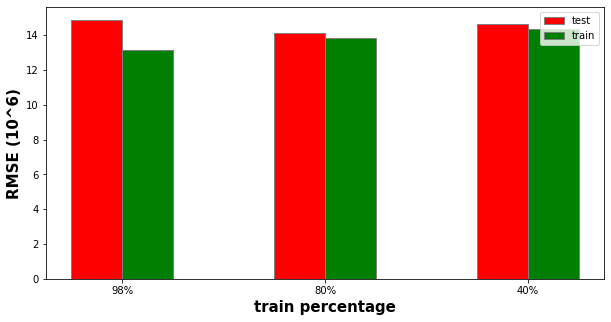

In [100]:
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5))
 
# linear regression
test = [14.88, 14.14, 14.63]
train = [13.16, 13.87, 14.37]
 
br1 = np.arange(len(test))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, test, color ='r', width = barWidth,
        edgecolor ='grey', label ='test')
plt.bar(br2, train, color ='g', width = barWidth,
        edgecolor ='grey', label ='train')
 
plt.xlabel('train percentage', fontweight ='bold', fontsize = 15)
plt.ylabel('RMSE (10^6)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(test))],
           ['98%', '80%', '40%'])
 
plt.legend()
plt.show()

<h1 style='text-align : justify; direction: rtl'>
    نتایج تغییر هایپر پارامتر ها
</h1>    

<h2 style='text-align : justify; direction: rtl'>
    (n_neighbors)
</h2>
<p style='text-align : justify; direction: rtl'>
در این قسمت مشاهده می‌شود که با افزایش k در ابتدا ارور تست کمتر شده و با افزایش آن ارور train نیز به تست نزدیکتر شده و over training از بین می‌رود.
    البته باید توجه داشت که زیاد کردن k از حدی به بعد، عملکرد را بهتر نکرده و ضمنا زمان اجرای برنامه نیز بالاتر می‌رود که مطلوب نیست.
</p>

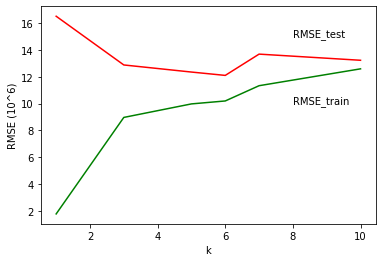

In [86]:
k =          [1, 3, 5, 6, 7, 10]
RMSE_train = [1.76, 8.97, 9.98, 10.20, 11.34, 12.60]
RMSE_test =  [16.53, 12.89, 12.36, 12.11, 13.70, 13.24]

plt.plot(k, RMSE_train, color="green")
plt.plot(k, RMSE_test, color="red")
plt.text(8,15, "RMSE_test")
plt.text(8,10, "RMSE_train")
plt.xlabel("k")
plt.ylabel("RMSE (10^6)")
plt.show()

<h2 style='text-align : justify; direction: rtl'>
    (min_samples_split)
</h2>
<p style='text-align : justify; direction: rtl'>
باید توجه داشت که افزایش این مقدار باعث شکسته نشدن نود به زیر شاخه و تصمیم گیری غیر دقیق توسط درخت می‌شود که مطلوب ما نیست. بنابراین بهتر است مقدار آن را در حدود 2 تا 4 قرار دهیم.
    <br>
    موردی دیگری که واضحا دیده می‌شود تفاوت ارور test و train است که از مشکلات اصلی decision tree بوده و حاکی از over training می‌باشد.
</p>

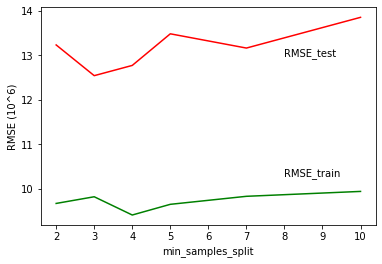

In [88]:
min_samples_split = [2, 3, 4, 5, 7, 10]
RMSE_train        = [9.67, 9.82, 9.41, 9.65, 9.83, 9.94]
RMSE_test         = [13.23, 12.54, 12.77, 13.48, 13.16, 13.85]

plt.plot(min_samples_split, RMSE_train, color="green")
plt.plot(min_samples_split, RMSE_test, color="red")
plt.text(8,13, "RMSE_test")
plt.text(8,10.3, "RMSE_train")
plt.xlabel("min_samples_split")
plt.ylabel("RMSE (10^6)")
plt.show()

<h2 style='text-align : justify; direction: rtl'>
    Q6:
    <br>
    (max_depth)
</h2>
<p style='text-align : justify; direction: rtl'>
    همان طور که در نمودار ها زیر نشان داده شده است، کم بودن عمق درخت باعث افزایش شدید خطای نهایی می‌شود. زیاد بودن آن اما از حدی به بعد کمکی به کم کردن خطای نهایی نمی‌کند و سود خاصی به ما نمی‌دهد. البته باید در نظر داشت که افزایش بیش از حد عمق درخت باعث افزایش مدت زمان اجرای الگوریتم می‌شود و همچنین باعث over train شدن داده ها می‌شود. (مطابق با نمودار، افزایش فاصله ارور train و test حاکی از این قضیه است)
    <br>
    گفتنی است که یکی از مشکلات اصلی درخت ها مخصوصا در عمق های بالا افزایش variance است. یک درخت با عمق بالا می‌تواند به ازای هر نمونه حالتی خاص در نظر گرفته و بیش از حد جزئیات داده ی train را در نظر بگیرد.
    <br>
    بنابراین نحوه برخورد با این هایپر پارامتر به این صورت است که مقداری مناسب و یا حتی بیشتر از نیاز، انتخاب کرده و خودمان را زیاد درگیر بهینه بودن آن نمی‌کنیم چون از مقداری به بعد تاثیر چندانی ندارد.
</p>

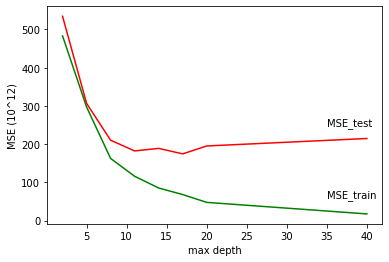

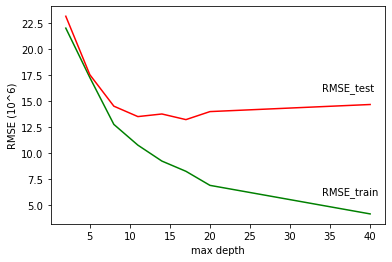

In [67]:
depth =      [2, 5, 8, 11, 14, 17, 20, 40]
MSE_train =  [483.15, 297.16, 162.48, 115.74, 85.12, 67.89, 47.48, 17.27]
MSE_test =   [534.62, 306.60, 210.16, 182.10, 188.79, 174.44, 195.10, 214.65]
RMSE_train = [21.98, 17.24, 12.74, 10.75, 9.22, 8.24, 6.89, 4.15]
RMSE_test =  [23.12, 17.51, 14.49, 13.49, 13.74, 13.20, 13.97, 14.65]

plt.plot(depth, MSE_train, color="green")
plt.plot(depth, MSE_test, color="red")
plt.text(35,250, "MSE_test")
plt.text(35,60, "MSE_train")
plt.xlabel("max depth")
plt.ylabel("MSE (10^12)")
plt.show()

plt.plot(depth, RMSE_train, color="green")
plt.plot(depth, RMSE_test, color="red")
plt.text(34,16, "RMSE_test")
plt.text(34,6, "RMSE_train")
plt.xlabel("max depth")
plt.ylabel("RMSE (10^6)")
plt.show()

***

<h1 style='text-align : justify; direction: rtl'>
    phase3
</h1>

<p style='text-align : justify; direction: rtl'>
حال قصد آشنایی با مدل دیگری از regressor ها را داریم.
    تا به حال تمامی مدل های بررسی شده، «مدل تنها» بودند و یک رگرسور جواب تخمین زده شده را به ما می‌داد.
    اما دسته دیگری که در این زمینه وجود دارد، مدل تجمیعی است. به عنوان مثال مدل random forrest که از تعدادی decision tree تشکیل شده است و بین جواب هر کدام از آنها میانگین می‌گیرد.
    <br>
    این مدل نیز هایپر پارامتر های مختلفی دارد که ما به شرح موارد زیر می‌پردازیم.
    <br>
    max_depth:
    از آن جا که مدل random forrest از تعدادی درخت تشکیل شده است، هایپر پارامتر های مربوط به درخت در این جا نیز وجود دارند که به عنوان مثال این مورد حداکثر عمق درخت ها را مشخص می‌کند.
    <br>
    max_features:
    هر کدام از درخت های جنگل، با دیتا های متفاوتی train می‌شوند. بنابراین با تعیین این مقدار می‌توان تعیین کرد که کدام ستون ها از dataset به عنوان فیچر به هر درخت داده شود.
    در این مورد انتخابمان بستگی به مدلمان و مقدار gain ای که هر فیچر به ما می‌دهد، دارد.
    به عنوان مثال در مدلی که اکثر فیچر ها noisy اند، بهتر است که درصد بالاتری از فیچر ها را به درختان ورودی دهیم تا نتیجه قابل اعتماد تری بگیریم. به همین صورت برای مدل هایی که فیچر های محکم و قابل اعتماد تری دارند، این درصد می‌تواند کمتر باشد.
    <br>
    n_jobs:
   با توجه به مستقل بودن درخت ها از یکدیگر، می‌توان با فعال کردن این مورد، پردازش آن ها را موازی کرد تا زمان کمتری نیاز داشته باشیم.
</p>

<h1 style='text-align : justify; direction: rtl'>
    نتایج تغییر هایپر پارامتر ها
</h1>    

<h2 style='text-align : justify; direction: rtl'>
(max_features)
</h2>    
<p style='text-align : justify; direction: rtl'>
از نمودار زیر مشخص است که افزایش این مقدار، ابتدا دقت بهتری به ما داده اما پس از مقداری، تاثیر خاصی نخواهد داشت.
    البته باید در نظر داشت که یکی از مواردی که باعث می‌شود random forest از decision tree کمتر over fit باشد، استقلال درخت های جنگل نسبت به همدیگر است. با افزایش بیش از حد این هایپر پارامتر در حقیقت درخت ها را کمی به هم مرتبط می‌کنیم که ممکن است باعث over fit شدن شود. این مورد را از افزایش فاصله بین نمودار ها می‌توان دریافت.
</p>

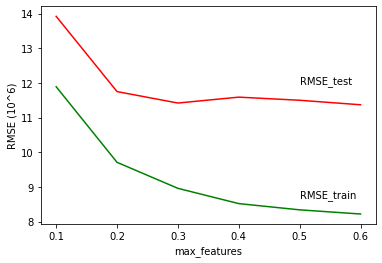

In [68]:
max_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
RMSE_train   = [11.89, 9.71, 8.96, 8.52, 8.34, 8.22]
RMSE_test    = [13.92, 11.75, 11.42, 11.59, 11.50, 11.37]

plt.plot(max_features, RMSE_train, color="green")
plt.plot(max_features, RMSE_test, color="red")
plt.text(0.5,12, "RMSE_test")
plt.text(0.5,8.7, "RMSE_train")
plt.xlabel("max_features")
plt.ylabel("RMSE (10^6)")
plt.show()

<h2 style='text-align : justify; direction: rtl'>
(max_depth)
</h2>    
<p style='text-align : justify; direction: rtl'>
توضیحات این قسمت نیز مانند decision tree است که بالاتر اشاره شد.
</p>

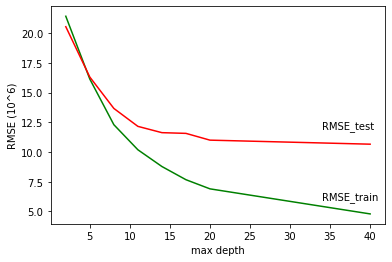

In [69]:
depth =      [2, 5, 8, 11, 14, 17, 20, 40]
RMSE_train = [21.43, 16.14, 12.30, 10.19, 8.78, 7.67, 6.90, 4.79]
RMSE_test =  [20.55, 16.31, 13.67, 12.16, 11.63, 11.57, 11.00, 10.66]

plt.plot(depth, RMSE_train, color="green")
plt.plot(depth, RMSE_test, color="red")
plt.text(34,12, "RMSE_test")
plt.text(34,6, "RMSE_train")
plt.xlabel("max depth")
plt.ylabel("RMSE (10^6)")
plt.show()

<h2 style='text-align : justify; direction: rtl'>
Q7:
</h2>
<p style='text-align : justify; direction: rtl'>
    واریانس بالا نشان دهنده آن است که مدل به ازای نمونه های داده train خیلی وسواسی و دقیق عملکرده است که ممکن است منجر به over fitting شود.
    <br>
    بایاس بالا نیز نشان دهنده آن است که مدل از خود در برابر تغییر به ازای اکثر نمونه ها، مقاومت نشان داده و جواب ها دقیق نیستند. این مورد نیز می‌تواند منجر به under fitting شود.
    <br>
    همان طور که پیش تر ذکر شد و در نمودار مربوط به max_depth درخت مشاهده کردیم، یکی از مشکلات اصلی decision tree ها پتانسیل بالای آن ها برای over fit شدن و داشتن variance بالا است.
    اما random forest ها با تدبیری که در این زمینه اندیشیده شده، دارای این مشکل نیستند.
    در جنگل ها، درختان مختلفی را توسط داده های متفاوت و فیچر های متفاوت train کرده و با میانگین گیری بین آن ها به جواب نهایی می‌رسیم. از آن جایی که correlation بین درخت ها بسیار پایین است، می‌توان گفت که random forest ها در اثر میانگین گیری از درخت ها مدلی ساده تر و general تر ارائه می‌دهند و از این نظر مدل مطلوب تری هستند و خطای کمتری هم دارند.
    
</p>

<h1>
    codes:
</h1>

In [28]:
def trimText(stemmer, lemmatizer, garbages, tokensList):
    for i in range(len(tokensList)-1, -1, -1):
        if tokensList[i] in garbages:
            tokensList.pop(i)

    tokensList = list(map(stemmer.stem, tokensList))
    tokensList = list(map(lemmatizer.lemmatize, tokensList))
    return " ".join(tokensList)



def doPreprocessings(df):
    df["description"] = df["title"] + " " + df["description"]
    df = df.drop(["title"], axis=1)

    df = df.dropna()
    df = df[df["price"] != -1]

    df["year"] = df["year"].replace(to_replace="<1366", value=1365)
    df["year"] = pd.to_numeric(df["year"])


    garbages = stopwords_list()
    normalizer = Normalizer()
    word_tokenizer = WordTokenizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    df["description"] = df.apply(lambda row: normalizer.normalize(row["description"]), axis=1)
    df["description"] = df.apply(lambda row: word_tokenizer.tokenize(row["description"]), axis=1)
    df["description"] = df.apply(lambda row: trimText(stemmer, lemmatizer,garbages, row["description"]), axis=1)

    return df

def calcIG(dataset):
    df = copy.copy(dataset)

    encoder = LabelEncoder()
    df["category"] = encoder.fit_transform(df["category"])
    df["brand"] = encoder.fit_transform(df["brand"])
    df["created_at"] = encoder.fit_transform(df["created_at"])


    x = df[df.columns.difference(["price", "description"])]
    y = df["price"]

    gains = mutual_info_regression(x[:2000], y[:2000])
    gains = pd.Series(gains)
    gains.index = x.columns

    return gains


def showGains(gains, cols):
    plt.bar(cols, gains[cols], color=(0.2, 0.4, 0.6, 0.6), edgecolor="blue")
    plt.show()


def dropLowGains(dataset, gains):
    gains["created_at"] = 0.0
    gains["category"] = 0.0
    dataset.drop(gains[gains.values == 0].index, axis=1, inplace=True)

    return dataset


def addElitWords(dataset, count):
    vectorizer = TfidfVectorizer(analyzer="word", ngram_range=(1, 1), min_df=len(dataset)//100)
    vectorized = vectorizer.fit_transform(dataset["description"])

    vectorizedDF = pd.DataFrame(vectorized.toarray(),
                      index=dataset.index,
                      columns=vectorizer.get_feature_names())

    featuresFreq = vectorizedDF.sum(axis=0).sort_values(ascending=False)
    elits = featuresFreq.head(count)

    for i in range(count):
        dataset[elits.index[i]] = vectorizedDF[elits.index[i]]
    dataset.drop(["description"], axis=1, inplace=True)

    return dataset


In [31]:
def calcMSE(x, y, model, oneHotCols, testSize):
    xCopy = copy.copy(x)

    xCopy = pd.get_dummies(xCopy, columns=oneHotCols)
    xTrain, xTest, yTrain, yTest = train_test_split(xCopy, y, test_size=testSize)

    model.fit(xTrain, yTrain)

    yTestPredict = model.predict(xTest)
    yTrainPredict = model.predict(xTrain)

    mseTest = mean_squared_error(yTest, yTestPredict)
    mseTrain = mean_squared_error(yTrain, yTrainPredict)

    return mseTest , mseTrain

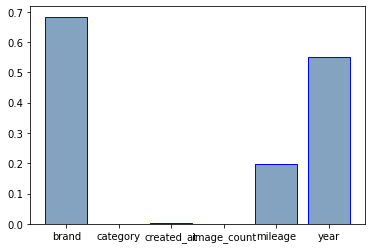

In [32]:
dataset = doPreprocessings(pd.read_csv("../vehicles.csv")[:])

dataset = addElitWords(dataset, 200)
gains = calcIG(dataset)
showGains(gains, ["brand", "category", "created_at",
                  "image_count", "mileage", "year"])

dataset = dropLowGains(dataset, gains)

In [33]:
x = dataset[dataset.columns.difference(["price"])]
y = dataset["price"]

x = x.drop(["mileage"], axis=1)

lrModel = LinearRegression()
knnModel = KNeighborsRegressor(n_neighbors=6)
dtModel = DecisionTreeRegressor(max_depth=15, min_samples_split=3)
rfModel = RandomForestRegressor(max_features=0.5, max_depth=15, n_jobs=100)

In [45]:
lrMSE = calcMSE(x, y, lrModel, ["brand"], 0.2)
print("linear regression error:\n", "MSE_train: ", lrMSE[1], "\n MSE_test: ", lrMSE[0])
print(" RMSE_train: ", np.sqrt(lrMSE[1]), "\n RMSE_test: ", np.sqrt(lrMSE[0]))

linear regression error:
 MSE_train:  217920958279437.06 
 MSE_test:  201883958802913.88
 RMSE_train:  14762146.127153635 
 RMSE_test:  14208587.50203249


In [46]:
knnMSE = calcMSE(x[:len(x)//4], y[:len(y)//4], knnModel, ["brand"], 0.2)
print("knn error:\n", "MSE_train: ", knnMSE[1], "\n MSE_test: ", knnMSE[0])
print(" RMSE_train: ", np.sqrt(knnMSE[1]), "\n RMSE_test: ", np.sqrt(knnMSE[0]))

knn error:
 MSE_train:  108814023682405.0 
 MSE_test:  137044715925888.61
 RMSE_train:  10431396.05625273 
 RMSE_test:  11706609.9245635


In [47]:
dtMSE = calcMSE(x, y, dtModel, ["brand"], 0.2)
print("decision tree error:\n", "MSE_train: ", dtMSE[1], "\n MSE_test: ", dtMSE[0])
print(" RMSE_train: ", np.sqrt(dtMSE[1]), "\n RMSE_test: ", np.sqrt(dtMSE[0]))

decision tree error:
 MSE_train:  74815750644512.98 
 MSE_test:  173234309409207.16
 RMSE_train:  8649609.855046237 
 RMSE_test:  13161850.531335142


In [48]:
rfMSE = calcMSE(x, y, rfModel, ["brand"], 0.2)
print("random forrest error:\n", "MSE_train: ", rfMSE[1], "\n MSE_test: ", rfMSE[0])
print(" RMSE_train: ", np.sqrt(rfMSE[1]), "\n RMSE_test: ", np.sqrt(rfMSE[0]))

random forrest error:
 MSE_train:  70884040979479.78 
 MSE_test:  134661013180504.64
 RMSE_train:  8419266.059430582 
 RMSE_test:  11604353.19957578


<h1 style='text-align : justify; direction: rtl'>
نتیجه گیری:
</h1>
<p style='text-align : justify; direction: rtl'>
بنابراین با مسايل regression آشنا شدیم و مدل های مختلف و پر کاربرد آن را بررسی کردیم.
    در ابتدا با پیش پردازش داده ها و روش های متفاوتی که در قسمت های مختلف وجود داشت اشنا شدیم. اعم از اصلاح داده های ناقص، حذف داده های بدون gain و...
    .
    سپس با مدل های آماده پایتون و کتابخانه sklearn آن ها را در شرایط مختلف با یکدیگر مقایسه کرده و نقاط ضعف و قوتشان را بیان کردیم.
    همچنین با tune کردن هایپر پارامتر های مربوط به هر مدل، خطای نهایی آن ها را بهینه کردیم.
    البته که مسائل مربوط به classification و regression گسترده تر از بررسی اندک ماست و مدل های قوی تری مانند شبکه های عصبی می‌تواند دیدگاه کاملا متفاوتی به این مسائل باشد.
</p>